# 라이브러리 설치

In [ ]:
!pip install Numpy

In [ ]:
!pip install customized_konlpy

In [ ]:
!pip install Pandas

In [ ]:
!pip install scikit-learn

In [ ]:
!pip install matplotlib

In [ ]:
!pip install seaborn

In [ ]:
!pip install nltk

In [ ]:
!pip install tensorflow

In [ ]:
!pip install keras

In [ ]:
!pip install gensim

In [ ]:
!pip install konlpy

# 데이터 로드 및 전처리

In [ ]:
import os
import json
from google.colab import drive

drive.mount('/content/gdrive')
%cd /content/gdrive/MyDrive/MedQuAD/hackathon_2-2

assert os.path.isdir('./data/train')
assert os.path.isfile('./data/train/MedQuAD_v1.0_train.json')

with open("./data/train/MedQuAD_v1.0_train.json", "r") as f:

    json_loaded = json.load(f)

### pretty print json
print(json.dumps(json_loaded, indent=1, ensure_ascii=False, sort_keys=True)[:10000])

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/.shortcut-targets-by-id/1h7xSEiydja1duXb72_sS-ndUxA01gx6M/hackathon_2-2
{
 "data": [
  {
   "paragraphs": [
    {
     "context": "A: 안녕하세요. A: 혹시 입원하러 오셨나요? B: 네. 여기요. A: 네. A: 000님 기다리고 있었어요. A: 얼른 키와 몸무게부터 재고 병실 안내해드리겠습니다. B: 네. A: 여기 올라가 보시겠어요? B: 짐은. A: 아 짐은 옆 의자에 두시면 될것같아요. B: 네. A: 네 되셨습니다. A: 내려오세요. B: 네. A: 그러면 이제 병실 안내해드릴건데 그전에 환자팔찌 채워드릴게요. A: 앞으로 주사나 약 투여할 때 꼭 확인해야하니까 빼거나 잃어 버리면 말씀해주세요. B: 네. A: 환자분 성함도 계속 물어볼텐데 정확한 환자 및 약물 투여를 확인하기 위해 하는 필요한 절차이니까 협조 잘 부탁드릴게요! B: 네네. A: 그러면 성함이랑 생년월일 말씀해주시겠어요? B: 네. 000, 00년 00월 00일. A: 네 000님 팔찌 매드릴게요. A: 되셨습니다. A: 병실 안내해드릴게요 이쪽으로 따라와 주세요. B: 네. A: 네 여기입니다. A: 어제 다 퇴원하셔서 지금은 자리가 다 비워져 있어요~ 편하신 자리에 앉아 주시겠어요? B: 네. 여기로 할게요. A: 네 나중에 자리 바꾸기 힘들다는 점 미리 말씀드리고요~ 일단은 환의로 갈아입으시고 짐 정리하고 계시면 다시와서 혈압이랑 체온도 재고, 환자분의 정확한 상태파악을 위해 몇가지 물어볼거에요. B: 네네. B: 이거는 제가 사용해도 되는거맞죠? A: 네네 열면 그냥 열릴꺼에요 편하게 사용하면 되세요. A: 지금 비

In [ ]:
print(len(json_loaded['data']))

335


In [ ]:
json_loaded['data'][0]['paragraphs'][0]['context']

'A: 안녕하세요. A: 혹시 입원하러 오셨나요? B: 네. 여기요. A: 네. A: 000님 기다리고 있었어요. A: 얼른 키와 몸무게부터 재고 병실 안내해드리겠습니다. B: 네. A: 여기 올라가 보시겠어요? B: 짐은. A: 아 짐은 옆 의자에 두시면 될것같아요. B: 네. A: 네 되셨습니다. A: 내려오세요. B: 네. A: 그러면 이제 병실 안내해드릴건데 그전에 환자팔찌 채워드릴게요. A: 앞으로 주사나 약 투여할 때 꼭 확인해야하니까 빼거나 잃어 버리면 말씀해주세요. B: 네. A: 환자분 성함도 계속 물어볼텐데 정확한 환자 및 약물 투여를 확인하기 위해 하는 필요한 절차이니까 협조 잘 부탁드릴게요! B: 네네. A: 그러면 성함이랑 생년월일 말씀해주시겠어요? B: 네. 000, 00년 00월 00일. A: 네 000님 팔찌 매드릴게요. A: 되셨습니다. A: 병실 안내해드릴게요 이쪽으로 따라와 주세요. B: 네. A: 네 여기입니다. A: 어제 다 퇴원하셔서 지금은 자리가 다 비워져 있어요~ 편하신 자리에 앉아 주시겠어요? B: 네. 여기로 할게요. A: 네 나중에 자리 바꾸기 힘들다는 점 미리 말씀드리고요~ 일단은 환의로 갈아입으시고 짐 정리하고 계시면 다시와서 혈압이랑 체온도 재고, 환자분의 정확한 상태파악을 위해 몇가지 물어볼거에요. B: 네네. B: 이거는 제가 사용해도 되는거맞죠? A: 네네 열면 그냥 열릴꺼에요 편하게 사용하면 되세요. A: 지금 비밀번호가 초기화되서 샾버튼 누르시고 편하신 번호 4자리 입력하시면 되세요. B: 아 네. A: 네 그러면 이따가 다시 오겠습니다. A: 커튼 치고 갈게요. B: 네. A: 환자분~ B: 네. A: 옷 다 갈아입으셨으면 들어갈게요. B: 네. A: 그러면 이제 혈압부터 재겠습니다. A: 편하게 누워계셔도 되세요. A: 팔만 편하게 내려주세요. B: 네. A: 네 감사합니다. A: 혈압은 108에 68, 맥박은 94회이시네요. A: 체온은 정상이에요. B: 몇도에요? A: 36.7도 입니다. B

In [ ]:
json_loaded['data'][0]['paragraphs'][0]['qas'][1]['question']

'흡연 여부'

In [ ]:
json_loaded['data'][0]['paragraphs'][0]['qas'][1]['answers'][0]['text']

'A: 흡연하시나요? B: 네 하죠.'

In [ ]:
def read_data(json_loaded):
    contexts, questions, answers = [], [], []

    for idx in range(len(json_loaded['data'])):
      context_temp = json_loaded['data'][idx]['paragraphs'][0]['context']
      context_temp =  context_temp.strip()

      for idx2 in range(len(json_loaded['data'][idx]['paragraphs'][0]['qas'])):
        contexts.append(context_temp)  # 질문&답변 갯수에 맞게 펼침
        questions.append(json_loaded['data'][idx]['paragraphs'][0]['qas'][idx2]['question'])
        answers.append(json_loaded['data'][idx]['paragraphs'][0]['qas'][idx2]['answers'][0]['text'])
    
    return contexts, questions, answers

In [ ]:
train = read_data(json_loaded)

In [ ]:
train_contexts, train_questions, train_answers = read_data(json_loaded)

In [ ]:
print('훈련용 본문의 개수 :', len(train_contexts))
print('훈련용 질문의 개수 :',len(train_questions))
print('훈련용 답변의 개수 :',len(train_answers))

훈련용 본문의 개수 : 3487
훈련용 질문의 개수 : 3487
훈련용 답변의 개수 : 3487


In [ ]:
train_contexts[1]

'A: 안녕하세요. A: 혹시 입원하러 오셨나요? B: 네. 여기요. A: 네. A: 000님 기다리고 있었어요. A: 얼른 키와 몸무게부터 재고 병실 안내해드리겠습니다. B: 네. A: 여기 올라가 보시겠어요? B: 짐은. A: 아 짐은 옆 의자에 두시면 될것같아요. B: 네. A: 네 되셨습니다. A: 내려오세요. B: 네. A: 그러면 이제 병실 안내해드릴건데 그전에 환자팔찌 채워드릴게요. A: 앞으로 주사나 약 투여할 때 꼭 확인해야하니까 빼거나 잃어 버리면 말씀해주세요. B: 네. A: 환자분 성함도 계속 물어볼텐데 정확한 환자 및 약물 투여를 확인하기 위해 하는 필요한 절차이니까 협조 잘 부탁드릴게요! B: 네네. A: 그러면 성함이랑 생년월일 말씀해주시겠어요? B: 네. 000, 00년 00월 00일. A: 네 000님 팔찌 매드릴게요. A: 되셨습니다. A: 병실 안내해드릴게요 이쪽으로 따라와 주세요. B: 네. A: 네 여기입니다. A: 어제 다 퇴원하셔서 지금은 자리가 다 비워져 있어요~ 편하신 자리에 앉아 주시겠어요? B: 네. 여기로 할게요. A: 네 나중에 자리 바꾸기 힘들다는 점 미리 말씀드리고요~ 일단은 환의로 갈아입으시고 짐 정리하고 계시면 다시와서 혈압이랑 체온도 재고, 환자분의 정확한 상태파악을 위해 몇가지 물어볼거에요. B: 네네. B: 이거는 제가 사용해도 되는거맞죠? A: 네네 열면 그냥 열릴꺼에요 편하게 사용하면 되세요. A: 지금 비밀번호가 초기화되서 샾버튼 누르시고 편하신 번호 4자리 입력하시면 되세요. B: 아 네. A: 네 그러면 이따가 다시 오겠습니다. A: 커튼 치고 갈게요. B: 네. A: 환자분~ B: 네. A: 옷 다 갈아입으셨으면 들어갈게요. B: 네. A: 그러면 이제 혈압부터 재겠습니다. A: 편하게 누워계셔도 되세요. A: 팔만 편하게 내려주세요. B: 네. A: 네 감사합니다. A: 혈압은 108에 68, 맥박은 94회이시네요. A: 체온은 정상이에요. B: 몇도에요? A: 36.7도 입니다. B

In [ ]:
train_questions[1]

'흡연 여부'

In [ ]:
train_answers[1]

'A: 흡연하시나요? B: 네 하죠.'

# Dev 전처리

In [ ]:
dev_input_file = os.path.join("data/dev/dev_input.txt")
dev_answer_file = os.path.join("data/dev/dev_answer.txt")

In [ ]:
def read_dev(dir_input, dir_answer):
  contexts, questions, answers = [], [], []

  lines = open(dir_input, "rb")

  for line in lines:
    line = line.decode("utf-8")

    context, question = line.split("\t")
    contexts.append(context)
    question = question.strip()
    questions.append(question)

  lines.close()


  lines = open(dir_answer, "rb")

  for line in lines:
    line = line.decode("utf-8")
    answer = line.strip()
    answers.append(answer)

  lines.close()

  return contexts, questions, answers

In [ ]:
dev = read_dev(dev_input_file, dev_answer_file)

In [ ]:
dev_contexts, dev_questions, dev_answers = read_dev(dev_input_file, dev_answer_file)

In [ ]:
dev_contexts[3]

'A: 안녕하세요. A: 환자번호 확인하겠습니다. A: 성함이 어떻게 되시나요? B: ㅇㅇㅇ입니다. A: 생년월일이 어떻게 되시나요? B: ㅇㅇ년 ㅇㅇ월 ㅇㅇ일 입니다. A: 주소와 연락처가 여기 기재되어 있는 게 맞나요? A: 확인 부탁 드립니다. B: 네 맞습니다. A: 불편한 곳이 있으신가요? B: 숨이 차서 왔습니다. A: 언제부터 그런 증상이 나타나셨나요? B: 이 주 정도 되었습니다. A: 심장이 두근거리는 느낌이 있으신가요? B: 심장이 많이 두근거리는 것이 느껴집니다. A: 흉통이 있으신가요? B: 아니요. 없습니다. A: 언제 주로 숨쉬기가 힘드시나요? B: 가만히 있으면 괜찮은데 운동을 하면 숨이 찹니다. B: 그리고 낮보다는 밤에 더 심해집니다. A: 호흡이 자세에 영향을 받나요? B: 네 누워 있을 때보다는 앉아 있을 때가 숨쉬기가 더 편안합니다. A: 식사 섭취량은 어떠셨나요? 평소와 비슷했나요? B: 네. A: 평소 과식을 하십니까? B: 아니요. A: 음식을 짜게 드시나요? B: 아니요 싱겁게 먹습니다. A: 기름진 음식을 많이 드시나요? B: 네 고기를 좋아합니다. A: 바나나 오렌지 시금치 견과류 등의 고포타슘 식품을 자주 드시나요? B: 바나나는 가끔 먹지만 견과류는 좋아하지 않습니다. A: 체중의 변화가 있으십니까? B: 아니요. A: 배변은 하셨나요? 변의 상태는 어땠었나요? B: 변비가 있습니다. A: 정서적으로 불편한 점이 있으신가요? B: 안절부절 못하겠습니다. A: 평소 하루에 몇 시간 주무시나요? B: 여섯 시간 정도 잡니다. A: 수면 시간은 평소와 같았나요? B: 아니요. A: 수면 시 어려움이 있나요? B: 잠이 잘 오지 않고 밤에 소변이 자주 마렵습니다. A: 종교가 어떻게 되시나요? B: 무교입니다. A: 고혈압 당뇨 결핵 간질환 심장병 고지혈증 뇌졸증 골다공증 종양 유전질환 감염성 질환 중 본인이 않고 있는 질환이 있으신가요? B: 네. 고혈압이 있습니다. A: 고혈압은 언제 진단받으셨나요? B: 1년 전

In [ ]:
dev_questions[0]

'내원 사유 확인'

In [ ]:
dev_answers[124]

'A: 환자분에 대해 몇 가지 여쭤보겠습니다 그전에, 환자분과의 관계가 어떻게 되시는가요? C: 와이프입니다.'

In [ ]:
print("dev_contexts 개수:" , len(dev_contexts))
print("dev_questions 개수: ", len(dev_questions))
print("dev_answers 개수: ", len(dev_answers))

dev_contexts 개수: 435
dev_questions 개수:  435
dev_answers 개수:  435


# 문장 토큰화

본문 내용을 'A의 질문, B또는C의 대답' 단위로 문장 토큰화 후 저장

In [ ]:
import re

In [ ]:
def sentence_tokenize(sent):
  result = []
  token_temp = []

  del_sent = ['A: ', 'A: 안녕하세요. ', 'A: 환자번호 확인하겠습니다. ', 'A: 네. ', 'A: 네 감사합니다. ']

  sentences = re.split('A: ', sent)

  for token in sentences:
    token = 'A: ' + token
    if token not in del_sent:
      token_temp.append(token)
      if token.find('B:') != -1 or token.find('C:') != -1:
        sentence = ''.join(token_temp)
        sentence = sentence.strip()
        result.append(sentence)
        token_temp = []
      else:
        if token[-2] != '?':
          token_temp.remove(token)

  return result

In [ ]:
print(sentence_tokenize(train_contexts[0]))

['A: 혹시 입원하러 오셨나요? B: 네. 여기요.', 'A: 얼른 키와 몸무게부터 재고 병실 안내해드리겠습니다. B: 네.', 'A: 여기 올라가 보시겠어요? B: 짐은.', 'A: 아 짐은 옆 의자에 두시면 될것같아요. B: 네.', 'A: 내려오세요. B: 네.', 'A: 앞으로 주사나 약 투여할 때 꼭 확인해야하니까 빼거나 잃어 버리면 말씀해주세요. B: 네.', 'A: 환자분 성함도 계속 물어볼텐데 정확한 환자 및 약물 투여를 확인하기 위해 하는 필요한 절차이니까 협조 잘 부탁드릴게요! B: 네네.', 'A: 그러면 성함이랑 생년월일 말씀해주시겠어요? B: 네. 000, 00년 00월 00일.', 'A: 병실 안내해드릴게요 이쪽으로 따라와 주세요. B: 네.', 'A: 어제 다 퇴원하셔서 지금은 자리가 다 비워져 있어요~ 편하신 자리에 앉아 주시겠어요? B: 네. 여기로 할게요.', 'A: 네 나중에 자리 바꾸기 힘들다는 점 미리 말씀드리고요~ 일단은 환의로 갈아입으시고 짐 정리하고 계시면 다시와서 혈압이랑 체온도 재고, 환자분의 정확한 상태파악을 위해 몇가지 물어볼거에요. B: 네네. B: 이거는 제가 사용해도 되는거맞죠?', 'A: 지금 비밀번호가 초기화되서 샾버튼 누르시고 편하신 번호 4자리 입력하시면 되세요. B: 아 네.', 'A: 커튼 치고 갈게요. B: 네.', 'A: 환자분~ B: 네.', 'A: 옷 다 갈아입으셨으면 들어갈게요. B: 네.', 'A: 팔만 편하게 내려주세요. B: 네.', 'A: 체온은 정상이에요. B: 몇도에요?', 'A: 36.7도 입니다. B: 네.', 'A: 음 병동을 같이 한번 돌까요? 그게 이해하기 편하실꺼같아요. B: 네네 편하신데로하세요.', 'A: 가면서 설명드리겠습니다. B: 네.', 'A: 병실에서 나와서 왼쪽으로 가시면 끝에 유리문 보이시죠? A: 저것이 비상구고요, 여기말고도 올라오신 엘리베이터 뒤에 계단이 또 있어요, 거기도 비상구로 사용합니다. B: 네네.', 'A: 안에 보시다시피 티비, 

In [ ]:
sentence_tokenize(train_contexts[0])

['A: 혹시 입원하러 오셨나요? B: 네. 여기요.',
 'A: 얼른 키와 몸무게부터 재고 병실 안내해드리겠습니다. B: 네.',
 'A: 여기 올라가 보시겠어요? B: 짐은.',
 'A: 아 짐은 옆 의자에 두시면 될것같아요. B: 네.',
 'A: 내려오세요. B: 네.',
 'A: 앞으로 주사나 약 투여할 때 꼭 확인해야하니까 빼거나 잃어 버리면 말씀해주세요. B: 네.',
 'A: 환자분 성함도 계속 물어볼텐데 정확한 환자 및 약물 투여를 확인하기 위해 하는 필요한 절차이니까 협조 잘 부탁드릴게요! B: 네네.',
 'A: 그러면 성함이랑 생년월일 말씀해주시겠어요? B: 네. 000, 00년 00월 00일.',
 'A: 병실 안내해드릴게요 이쪽으로 따라와 주세요. B: 네.',
 'A: 어제 다 퇴원하셔서 지금은 자리가 다 비워져 있어요~ 편하신 자리에 앉아 주시겠어요? B: 네. 여기로 할게요.',
 'A: 네 나중에 자리 바꾸기 힘들다는 점 미리 말씀드리고요~ 일단은 환의로 갈아입으시고 짐 정리하고 계시면 다시와서 혈압이랑 체온도 재고, 환자분의 정확한 상태파악을 위해 몇가지 물어볼거에요. B: 네네. B: 이거는 제가 사용해도 되는거맞죠?',
 'A: 지금 비밀번호가 초기화되서 샾버튼 누르시고 편하신 번호 4자리 입력하시면 되세요. B: 아 네.',
 'A: 커튼 치고 갈게요. B: 네.',
 'A: 환자분~ B: 네.',
 'A: 옷 다 갈아입으셨으면 들어갈게요. B: 네.',
 'A: 팔만 편하게 내려주세요. B: 네.',
 'A: 체온은 정상이에요. B: 몇도에요?',
 'A: 36.7도 입니다. B: 네.',
 'A: 음 병동을 같이 한번 돌까요? 그게 이해하기 편하실꺼같아요. B: 네네 편하신데로하세요.',
 'A: 가면서 설명드리겠습니다. B: 네.',
 'A: 병실에서 나와서 왼쪽으로 가시면 끝에 유리문 보이시죠? A: 저것이 비상구고요, 여기말고도 올라오신 엘리베이터 뒤에 계단이 또 있어요, 거기도 비상구로 사용합니다. B: 네네.

# 텍스트 단어 인덱싱, 벡터화

In [ ]:
# 토큰화 함수

from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from konlpy.tag import Okt
okt = Okt()

def tokenize(sent):
    return okt.morphs(sent)

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
import numpy as np
from nltk import FreqDist
from functools import reduce
import matplotlib.pyplot as plt

In [ ]:
def word_indexing(train_data, test_data):
  counter = FreqDist()

  context_len = []
  question_len = []
  answer_len = []

  for contexts, questions, answers in [train_data, test_data]:
    for context in contexts:
      sentences = tokenize(context) # context 단어 단위로 토큰화
      context_len.append(len(sentences)) # 각 context 길이 저장
      for word in sentences: # 단어 집합에 단어 추가
        counter[word] += 1
      
    for question in questions:
      question = tokenize(question)
      question_len.append(len(question))
      for word in question:
        counter[word] += 1

    for answer in answers:
      answer = tokenize(answer)
      answer_len.append(len(answer))
      for word in answer:
        counter[word] += 1


  # 단어 집합 생성
  word2idx = {word : (idx + 1) for idx, (word, _) in enumerate(counter.most_common())}
  idx2word = {idx : word for word, idx in word2idx.items()}

  word2idx[""] = 0
  idx2word[0] = ""
      

  # 가장 긴 샘플의 길이
  context_max_len = np.max(context_len)
  question_max_len = np.max(question_len)
  answer_max_len = np.max(answer_len)

  return word2idx, idx2word, context_max_len, question_max_len, answer_max_len



In [ ]:
word2idx, idx2word, context_max_len, question_max_len, answer_max_len = word_indexing(train, dev)

In [ ]:
# context의 문장 모음집

def sent_indexing(train_data, test_data):
  counter = FreqDist()
  sentence_len = []

  for contexts, questions, answers in [train_data, test_data]:
    for context in contexts:
      sentences = sentence_tokenize(context) # context 대화체(answer 형식) 단위로 토큰화
      for sentence in sentences:
        counter[sentence] += 1
        sentence_len.append(len(sentence))

  docs2idx = {docs : (idx + 1) for idx, (docs, _) in enumerate(counter.most_common())}
  idx2docs = {idx : docs for docs, idx in docs2idx.items()}

  docs2idx[""] = 0
  idx2docs[0] = ""

  sentence_max_len = np.max(sentence_len)

  return docs2idx, idx2docs, sentence_max_len

In [ ]:
# answer 기준으로 docs_indexting

def answer_indexing(answers):
  counter = FreqDist()

  for answer in answers:
    counter[answer] += 1

  ans2idx = {ans : (idx + 1) for idx, (ans, _) in enumerate(counter.most_common())}
  idx2ans = {idx : ans for ans, idx in ans2idx.items()}

  return ans2idx, idx2ans

In [ ]:
ans2idx, idx2ans = answer_indexing(train[2])

In [ ]:
ans_size = len(ans2idx) + 1
print(ans_size)

2430


In [ ]:
print(word2idx)

{':': 1, '.': 2, 'A': 3, 'B': 4, '?': 5, '이': 6, '에': 7, '네': 8, '가': 9, '을': 10, ',': 11, '은': 12, '가요': 13, '있으신': 14, '는': 15, '를': 16, '요': 17, '아니요': 18, '것': 19, '적': 20, '없습니다': 21, '때': 22, '혹시': 23, '정도': 24, '한': 25, '의': 26, '으로': 27, '와': 28, '없어요': 29, '로': 30, '입니다': 31, '입원': 32, '있나요': 33, '환자': 34, '부분': 35, '분': 36, '이나': 37, '점': 38, '평소': 39, '시간': 40, '됩니다': 41, '도': 42, '같아요': 43, '증상': 44, '병원': 45, '있습니다': 46, '고': 47, '통증': 48, '잘': 49, '나': 50, '여기': 51, 'C': 52, '과': 53, '최근': 54, '어떻게': 55, '하는': 56, '따로': 57, '서': 58, '몇': 59, '하고': 60, '하겠습니다': 61, '확인': 62, '해': 63, '등': 64, '지금': 65, '퇴원': 66, '사용': 67, '소변': 68, '않았나요': 69, '안': 70, '약': 71, '하루': 72, '거': 73, '질환': 74, '어려움': 75, '할': 76, '있어요': 77, '시': 78, '에서': 79, '전': 80, '에는': 81, '같은': 82, '가족': 83, '번': 84, '그런': 85, '문제': 86, '하시면': 87, '하실': 88, '수술': 89, '간호사': 90, '고혈압': 91, '언제': 92, '다른': 93, '많이': 94, '부터': 95, '어떤': 96, '면': 97, '되시나요': 98, '있거나': 99, '수': 100, '이용': 101, '말씀': 102, '된'

In [ ]:
vocab_size = len(word2idx) + 1
print(vocab_size)

12037


In [ ]:
docs2idx, idx2docs, sentence_max_len = sent_indexing(train, dev)

In [ ]:
idx2docs

{1: 'A: 수면 시간은 평소와 같았나요? B: 평소와 같았어요.',
 2: 'A: 추가적으로 궁금하신 사항 있으실까요? B: 없습니다.',
 3: 'A: 수면시 어려움이 있나요? B: 없어요.',
 4: 'A: 소변 볼 때 어려움이 있었나요? B: 없어요.',
 5: 'A: 기침을 하거나 가래가 있거나 숨쉬기 어려움은 없었나요? B: 없었습니다.',
 6: 'A: 신발 벗고 올라와서 측정하겠습니다. B: 네.',
 7: 'A: 성함이 어떻게 되세요? B: ㅇㅇㅇ입니다.',
 8: 'A: 네 간단한 검사나 영상 자료를 통해서 치료 계획을 잡아 보기로 하겠습니다. B: 네.',
 9: 'A: 최근 예방접종 맞으셨나요? B: 독감 예방주사 맞았습니다.',
 10: 'A: 대변 볼 때 어려움이 있었나요? B: 없어요.',
 11: 'A: 혹시 한쪽 부분이 힘이 빠질신다고 나 다른 부위에 비해 내 힘이 좀 덜 들어 간다 라고 느껴지는 부분은 있을까요? B: 그런 부분도 따로 없는 것 같아요.',
 12: 'A: 혹시 제가 누군지는 알고 계신가요? B: 제 진료를 담당 해 주시는 의사 선생님이세요.',
 13: 'A: 여기가 어딘지는 알고 계실까요? B: 네 병원 진료실에서 진료를 받고 있어요.',
 14: 'A: 이렇게 서로 의사소통을 하는 데는 별로 어려움이 없으신가요? B: 네.',
 15: 'A: 성함이 어떻게 되시나요? B: ㅇㅇㅇ입니다.',
 16: 'A: 혹시 몸에 마비 증상이 있거나 어디 한 부분이 자기 마음대로 움직여 지지 않는 부분이 있을까요? B: 아니요 그런 부분은 없어요.',
 17: 'A: 1년 이내에 해외여행 경험은 있으신가요? B: 코로나 때문에 없어요.',
 18: 'A: 혹시 필요하신 부분이 있나요? B: 아니오.',
 19: 'A: 궁금하신 부분 있으시면 언제든지 간호사실에 물어보시면 됩니다. B: 감사합니다.',
 20: 'A: 생년월일이 어떻게 되시나요? B: ㅇㅇ년 ㅇㅇ월 ㅇㅇ일 입니다.',
 21: 'A: 이명이 들리거나 청력

In [ ]:
docs_size = len(docs2idx) + 1
print(docs_size)

9198


In [ ]:
print('본문 전체의 최대 길이 :', context_max_len)
print('질문의 최대 길이 :', question_max_len)
print('답변의 최대 길이 :', answer_max_len)
print('본문 문장의 최대 길이 :', sentence_max_len)

본문 전체의 최대 길이 : 6447
질문의 최대 길이 : 7
답변의 최대 길이 : 188
본문 문장의 최대 길이 : 474


In [ ]:
# context, question => word2idx 정보로 단어 벡터화
# answer => docs2idx 정보로 벡터화

def vectorize(data, word2idx, docs2idx, idx2docs, context_max_len, question_max_len):
    Xc, Xq, Y = [], [], []

    contexts, questions, answers = data
    for context, question, answer in zip(contexts, questions, answers):
        xc = [word2idx[w] for w in tokenize(context)]
        xq = [word2idx[w] for w in tokenize(question)]
        for x in range(len(idx2docs)):
          if answer in idx2docs[x+1]:
            y = docs2idx[idx2docs[x+1]]
        Xc.append(xc)
        Xq.append(xq)
        Y.append(y)

        # 스토리와 질문은 각각의 최대 길이로 패딩
    return pad_sequences(Xc, maxlen=context_max_len),\
           pad_sequences(Xq, maxlen=question_max_len),\
           to_categorical(Y, num_classes=len(docs2idx) + 1)


In [ ]:
Xctrain, Xqtrain, Ytrain = vectorize(train, word2idx, docs2idx, idx2docs, context_max_len, question_max_len)
Xctest, Xqtest, Ytest = vectorize(dev, word2idx, docs2idx, idx2docs, context_max_len, question_max_len)

In [ ]:
# question => word2idx 정보로 단어 벡터화
# context, answer => docs2idx 정보로 벡터화

def vectorize_sent(data, word2idx, docs2idx, idx2docs, sentence_max_len, question_max_len):
    Xc, Xq, Y = [], [], []

    contexts, questions, answers = data
    for context, question, answer in zip(contexts, questions, answers):
        xc = [docs2idx[w] for w in sentence_tokenize(context)]
        xq = [word2idx[w] for w in tokenize(question)]
        for x in range(len(idx2docs)-1):
          if answer in idx2docs[x+1]:
            y = docs2idx[idx2docs[x+1]]
        Xc.append(xc)
        Xq.append(xq)
        Y.append(y)


    return pad_sequences(Xc, maxlen=sentence_max_len),\
           pad_sequences(Xq, maxlen=question_max_len),\
           to_categorical(Y, num_classes=len(docs2idx) + 1)

In [ ]:
Xctrain, Xqtrain, Ytrain = vectorize_sent(train, word2idx, docs2idx, idx2docs, sentence_max_len, question_max_len)
Xctest, Xqtest, Ytest = vectorize_sent(dev, word2idx, docs2idx, idx2docs, sentence_max_len, question_max_len)

In [ ]:
# context, question, answer 모두 word2idx 정보로 벡터화

def vectorize(data, word2idx, context_max_len, question_max_len, answer_max_len):
    Xc, Xq, Y = [], [], []

    contexts, questions, answers = data
    for context, question, answer in zip(contexts, questions, answers):
        xc = [word2idx[w] for w in tokenize(context)]
        xq = [word2idx[w] for w in tokenize(question)]
        y = [word2idx[w] for w in tokenize(answer)]
        Xc.append(xc)
        Xq.append(xq)
        Y.append(y)

        # 스토리와 질문은 각각의 최대 길이로 패딩
    return pad_sequences(Xc, maxlen=context_max_len),\
           pad_sequences(Xq, maxlen=question_max_len),\
           pad_sequences(Y, maxlen=answer_max_len)

In [ ]:
print(Xctrain.shape, Xqtrain.shape, Ytrain.shape, Xctest.shape, Xqtest.shape, Ytest.shape)

(3487, 474) (3487, 7) (3487, 9198) (435, 474) (435, 7) (435, 9198)


In [ ]:
Xqtest[0]

array([   0,    0,    0,  111, 1129, 1428,   62], dtype=int32)

In [ ]:
" ".join([idx2word[x] for x in Xqtrain[1].tolist()])

'     흡연 여부'

In [ ]:
" ".join([idx2docs[x] for x in Xctrain[0].tolist()])

'                                                                                                                                                                                                                                                                                                                                                                                  A: 혹시 입원하러 오셨나요? B: 네. 여기요. A: 얼른 키와 몸무게부터 재고 병실 안내해드리겠습니다. B: 네. A: 여기 올라가 보시겠어요? B: 짐은. A: 아 짐은 옆 의자에 두시면 될것같아요. B: 네. A: 내려오세요. B: 네. A: 앞으로 주사나 약 투여할 때 꼭 확인해야하니까 빼거나 잃어 버리면 말씀해주세요. B: 네. A: 환자분 성함도 계속 물어볼텐데 정확한 환자 및 약물 투여를 확인하기 위해 하는 필요한 절차이니까 협조 잘 부탁드릴게요! B: 네네. A: 그러면 성함이랑 생년월일 말씀해주시겠어요? B: 네. 000, 00년 00월 00일. A: 병실 안내해드릴게요 이쪽으로 따라와 주세요. B: 네. A: 어제 다 퇴원하셔서 지금은 자리가 다 비워져 있어요~ 편하신 자리에 앉아 주시겠어요? B: 네. 여기로 할게요. A: 네 나중에 자리 바꾸기 힘들다는 점 미리 말씀드리고요~ 일단은 환의로 갈아입으시고 짐 정리하고 계시면 다시와서 혈압이랑 체온도 재고, 환자분의 정확한 상태파악을 위해 몇가지 물어볼거에요. B: 네네. B: 이거는 제가 사용해도 되는거맞죠? A: 지금 비밀번호가 초기화되서 샾버튼 누르시고 편하신 번호 4자리 입력하시면 되세요. B: 아 네. A: 커튼 치고 갈게요. B:

# MemN

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Permute, dot, add, concatenate
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input, Activation

In [ ]:
# 에포크 횟수
train_epochs = 120
# 배치 크기
batch_size = 32
# 임베딩 크기
embed_size = 50
# LSTM의 크기
lstm_size = 64
# 과적합 방지 기법인 드롭아웃 적용 비율
dropout_rate = 0.30

In [ ]:
# 플레이스 홀더. 입력을 담는 변수
input_sequence = Input((context_max_len,))
question = Input((question_max_len,))

print('Stories :', input_sequence)
print('Question:', question)

Stories : KerasTensor(type_spec=TensorSpec(shape=(None, 474), dtype=tf.float32, name='input_7'), name='input_7', description="created by layer 'input_7'")
Question: KerasTensor(type_spec=TensorSpec(shape=(None, 7), dtype=tf.float32, name='input_8'), name='input_8', description="created by layer 'input_8'")


In [ ]:
# 스토리를 위한 첫번째 임베딩. 그림에서의 Embedding A
input_encoder_m = Sequential()
input_encoder_m.add(Embedding(input_dim=vocab_size,
                              output_dim=embed_size))
input_encoder_m.add(Dropout(dropout_rate))
# 결과 : (samples, story_max_len, embedding_dim) / 샘플의 수, 문장의 최대 길이, 임베딩 벡터의 차원

# 스토리를 위한 두번째 임베딩. 그림에서의 Embedding C
# 임베딩 벡터의 차원을 question_max_len(질문의 최대 길이)로 한다.
input_encoder_c = Sequential()
input_encoder_c.add(Embedding(input_dim=vocab_size,
                              output_dim=question_max_len))
input_encoder_c.add(Dropout(dropout_rate))
# 결과 : (samples, story_max_len, question_max_len) / 샘플의 수, 문장의 최대 길이, 질문의 최대 길이(임베딩 벡터의 차원)

In [ ]:
# 질문을 위한 임베딩. 그림에서의 Embedding B
question_encoder = Sequential()
question_encoder.add(Embedding(input_dim=vocab_size,
                               output_dim=embed_size,
                               input_length=question_max_len))
question_encoder.add(Dropout(dropout_rate))
# 결과 : (samples, question_max_len, embedding_dim) / 샘플의 수, 질문의 최대 길이, 임베딩 벡터의 차원


In [ ]:
# 실질적인 임베딩 과정
input_encoded_m = input_encoder_m(input_sequence)
input_encoded_c = input_encoder_c(input_sequence)
question_encoded = question_encoder(question)

print('Input encoded m', input_encoded_m)
print('Input encoded c', input_encoded_c)
print('Question encoded', question_encoded)

Input encoded m KerasTensor(type_spec=TensorSpec(shape=(None, 474, 50), dtype=tf.float32, name=None), name='sequential_8/dropout_10/Identity:0', description="created by layer 'sequential_8'")
Input encoded c KerasTensor(type_spec=TensorSpec(shape=(None, 474, 7), dtype=tf.float32, name=None), name='sequential_9/dropout_11/Identity:0', description="created by layer 'sequential_9'")
Question encoded KerasTensor(type_spec=TensorSpec(shape=(None, 7, 50), dtype=tf.float32, name=None), name='sequential_10/dropout_12/Identity:0', description="created by layer 'sequential_10'")


In [ ]:
# 스토리 단어들과 질문 단어들 간의 유사도를 구하는 과정
# 유사도는 내적을 사용한다.
match = dot([input_encoded_m, question_encoded], axes=-1, normalize=False)
match = Activation('softmax')(match)
print('Match shape', match)
# 결과 : (samples, story_maxlen, question_max_len) / 샘플의 수, 문장의 최대 길이, 질문의 최대 길이

# add the match matrix with the second input vector sequence
response = add([match, input_encoded_c])  # (samples, story_max_len, question_max_len)
response = Permute((2, 1))(response)  # (samples, question_max_len, story_max_len)
print('Response shape', response)

# concatenate the response vector with the question vector sequence
answer = concatenate([response, question_encoded])
print('Answer shape', answer)

answer = LSTM(lstm_size)(answer)  # Generate tensors of shape 32
answer = Dropout(dropout_rate)(answer)
answer = Dense(docs_size)(answer)  # (samples, vocab_size)
# we output a probability distribution over the vocabulary
answer = Activation('softmax')(answer)

Match shape KerasTensor(type_spec=TensorSpec(shape=(None, 474, 7), dtype=tf.float32, name=None), name='activation_4/truediv:0', description="created by layer 'activation_4'")
Response shape KerasTensor(type_spec=TensorSpec(shape=(None, 7, 474), dtype=tf.float32, name=None), name='permute_2/transpose:0', description="created by layer 'permute_2'")
Answer shape KerasTensor(type_spec=TensorSpec(shape=(None, 7, 524), dtype=tf.float32, name=None), name='concatenate_2/concat:0', description="created by layer 'concatenate_2'")


In [1]:
# build the final model
model = Model([input_sequence, question], answer)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy',
              metrics=['acc'])

print(model.summary())

# start training the model
history = model.fit([Xctrain, Xqtrain],
         Ytrain, batch_size, train_epochs,
         validation_data=([Xctest, Xqtest], Ytest))

# save model
model.save('model.h5')

NameError: ignored

In [2]:
# save model
model.save('model.h5')

NameError: ignored

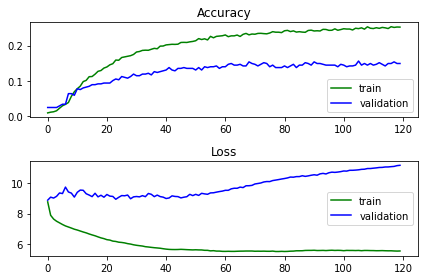

In [ ]:
# plot accuracy and loss plot
plt.subplot(211)
plt.title("Accuracy")
plt.plot(history.history["acc"], color="g", label="train")
plt.plot(history.history["val_acc"], color="b", label="validation")
plt.legend(loc="best")

plt.subplot(212)
plt.title("Loss")
plt.plot(history.history["loss"], color="g", label="train")
plt.plot(history.history["val_loss"], color="b", label="validation")
plt.legend(loc="best")

plt.tight_layout()
plt.show()

# labels
ytest = np.argmax(Ytest, axis=1)

# get predictions
Ytest_ = model.predict([Xctest, Xqtest])
ytest_ = np.argmax(Ytest_, axis=1)

In [ ]:
NUM_DISPLAY = 30

print("{:18}|{:5}|{}".format("질문", "실제값", "예측값"))
print(39 * "-")

for i in range(NUM_DISPLAY):
    question = " ".join([idx2word[x] for x in Xqtest[i].tolist()])
    label = idx2docs[ytest[i]]
    prediction = idx2docs[ytest_[i]]
    print("{:20} {:7} {}".format(question, label, prediction))

질문                |실제값  |예측값
---------------------------------------
   내 원 사유 확인         A: 불편한 곳이 있으신가요? B: 숨이 차서 왔습니다. A: 이전에 다른 질병을 앓았던 적이 있나요? B: 아뇨.
  주 증상 발생 기간 확인      A: 언제부터 그런 증상이 나타나셨나요? B: 이 주 정도 되었습니다. A: 흡연을 하시나요? B: 아니요.
     통증 유무           A: 흉통이 있으신가요? B: 아니요. 없습니다. A: 최근에 투약하고 있던 약이 있나요? B: 혈압약 말고는 없습니다.
    체중 변화 확인         A: 체중의 변화가 있으십니까? B: 아니요. 없습니다. A: 갑자기 체중변화가 있지는 않았나요? B: 네 그대로 입니다.
   대 소변 어려움 유무       A: 배변은 하셨나요? 변의 상태는 어땠었나요? B: 변비가 있습니다. A: 소변 볼 때 어려움이 있었나요? B: 없어요. B: 피가 나오는 것처럼 소변이 붉은 것 말고는 문제가 없었어요.
  하루 평균 수면 시간 확인     A: 평소 하루에 몇 시간 주무시나요? B: 여섯 시간 정도 잡니다. A: 최근에 투약하고 있던 약이 있나요? B: 없습니다. B: 종합비타민만 먹고 있습니다.
    보유 질병 확인         A: 고혈압 당뇨 결핵 간질환 심장병 고지혈증 뇌졸증 골다공증 종양 유전질환 감염성 질환 중 본인이 않고 있는 질환이 있으신가요? B: 네. 고혈압이 있습니다. A: 고혈압 당뇨 결핵 간질환 심장병 고지혈증 뇌졸증 골다공증 종양 유전질환 감염성 질환 중 본인이 않고 있는 질환이 있으신가요? B: 아니요. 없습니다.
  가족 중 병력 유무 확인      A: 고혈압 당뇨 결핵 간질환 심장병 뇌졸증 종양 유전질환 감염성 질환을 가진 가족이 있으신가요? B: 네. 아버지가 고혈압이 있으십니다. A: 고혈압 당뇨 결핵 간질환 심장병 뇌졸증 종양 유전질환 감염성 질환을 가진 가족이 있